In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [3]:
from google_play_scraper import Sort, reviews_all

In [4]:
def scrape_reviews(app_id):
    reviews = reviews_all(app_id,
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
    filter_score_with=1
    )
    return reviews

In [7]:
df_mmt = pd.DataFrame(np.array(scrape_reviews('com.makemytrip')),columns=['review'])
df_mmt = df_mmt.join(pd.DataFrame(df_mmt.pop('review').tolist()))
df_mmt.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGyrfRNYsXgexAcwbQLGFwPzawvUryFcA7c71r...,Mano Krishnan,https://play-lh.googleusercontent.com/a-/AOh14...,I did not stay in Sartaj-The Crown as I was no...,1,1,8.6.3,2021-11-30 08:56:06,"We want to fix this for you, please share deta...",2021-11-30 11:26:02
1,gp:AOqpTOHpVv9GgN06y09dO-Z2vNDzSQRgGHpswZqzdQo...,Jaganathan Meenakshisundaram,https://play-lh.googleusercontent.com/a/AATXAJ...,We have cancelled the booking because check-in...,1,1,8.6.3,2021-11-28 13:15:50,"We want to fix this for you, please share deta...",2021-11-28 13:52:22
2,gp:AOqpTOFXtkbPZ87C956UHSGcTKxn3sYZvT2W6cO37aO...,Prashant Abhishek,https://play-lh.googleusercontent.com/a-/AOh14...,Deducted money from bank account but not given...,1,2,8.6.3,2021-11-27 13:41:00,"We want to fix this for you, please share deta...",2021-11-27 13:56:14
3,gp:AOqpTOHnghb_BmSCOQPz99nC0KPB8sDGxEFeeCidk6H...,Vijay Penmetsa,https://play-lh.googleusercontent.com/a-/AOh14...,"Horrible App, zero customer service. App goes ...",1,1,8.6.3,2021-12-06 18:51:25,Could you please share details of your issue a...,2021-12-07 11:25:10
4,gp:AOqpTOFSf2xqd0FXCh3frfW6PAeXpZSLwSmegAEUAiC...,vaidehi balaji,https://play-lh.googleusercontent.com/a/AATXAJ...,There is no help section. You cannot talk to a...,1,2,8.6.2,2021-11-25 10:42:15,"We want to fix this for you, please share deta...",2021-11-26 17:14:30


In [8]:
df_mmt.shape

(4378, 10)

In [9]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [10]:
import nltk
stemmer = nltk.PorterStemmer()

In [11]:
from nltk.corpus import stopwords
from collections import Counter
import re

stop_words = set(stopwords.words('English'))

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextProcessor(BaseEstimator, TransformerMixin):
    def __init__(self, lower_case=True, remove_punctuation=True, remove_numbers=True, lemmatizing=True, remove_stopwords=True, stemming=True):
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.lemmatizing = lemmatizing
        self.remove_stopwords = remove_stopwords
        self.stemming = stemming
        
    def fit(self,X ,y=None):
        return self
    
    def transform(self, X, y=None):
        X_processed = []
        for text in X:
            if self.lower_case:
                text = text.lower()
            if self.remove_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', ' ', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            if self.remove_stopwords:
                text = [word for word in text.split() if not word in stop_words]
            """if self.lemmatizing:
                lem_words = []
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem_words.append(word_lemma)
                text = lem_words
                """
            if self.stemming:
                stemmed_words=[]
                for word in text:
                    word_stem = stemmer.stem(word)
                    stemmed_words.append(word_stem)
                text = stemmed_words
            bigram_words = []
            for i in range(len(text)-1):
                bigram_words.append(text[i]+" "+text[i+1])
            word_counts = Counter(bigram_words)
            #word_counts = Counter(text)
            """if self.lemmatizing:
                #lem_counter = Counter()
                lem=[]
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem.append(word_lemma)"""
            
            X_processed.append(word_counts)
        return np.array(X_processed)

In [13]:
text_processor = TextProcessor()
data = text_processor.fit_transform(df_mmt['content'])
data

array([Counter({'stay sartaj': 1, 'sartaj crown': 1, 'crown happi': 1, 'happi place': 1, 'place construct': 1, 'construct go': 1, 'go room': 1, 'room dud': 1, 'dud nit': 1, 'nit suffici': 1, 'suffici heat': 1, 'heat cold': 1, 'cold wife': 1, 'wife gad': 1, 'gad walk': 1, 'walk two': 1, 'two flight': 1, 'flight stair': 1, 'stair reach': 1, 'reach room': 1, 'room smell': 1, 'smell recept': 1, 'recept area': 1, 'area unhappi': 1, 'unhappi place': 1, 'place stay': 1, 'stay hour': 1, 'hour spend': 1, 'spend extra': 1, 'extra money': 1, 'money altern': 1, 'altern accommod': 1, 'accommod nearbi': 1, 'nearbi mmt': 1, 'mmt black': 1, 'black member': 1, 'member use': 1, 'use servic': 1, 'servic long': 1, 'long time': 1}),
       Counter({'cancel book': 1, 'book check': 1, 'check time': 1, 'time noon': 1, 'noon even': 1, 'even though': 1, 'though opt': 1, 'opt pleas': 1, 'pleas delist': 1, 'delist hotel': 1, 'hotel checkin': 1, 'checkin time': 1, 'time option': 1, 'option may': 1, 'may noon': 1, 

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [64]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_mmt['content'])

In [65]:
true_k = 4
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=4, n_init=1)

In [66]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [67]:
for i in range(true_k):
    print('Cluster %d:' % i),
    for ind in order_centroids[i, :20]:
         print(' %s' % terms[ind])

Cluster 0:
 app
 booking
 mmt
 trip
 service
 worst
 bus
 time
 experience
 make
 book
 money
 don
 bad
 cab
 flight
 customer
 booked
 payment
 tickets
Cluster 1:
 refund
 ticket
 flight
 cancelled
 app
 money
 worst
 booked
 got
 mmt
 customer
 trip
 service
 book
 airline
 didn
 booking
 experience
 bad
 days
Cluster 2:
 hotel
 booking
 room
 booked
 mmt
 app
 make
 trip
 experience
 worst
 customer
 check
 service
 bad
 don
 money
 book
 care
 rooms
 denied
Cluster 3:
 customer
 care
 support
 service
 contact
 app
 worst
 option
 booking
 way
 number
 refund
 pathetic
 mmt
 talk
 connect
 reach
 email
 flight
 experience


In [72]:
issues = [ 'Payment and refund issues',
          'Booking issues',
         'Customer service',
         'accessibility issues',
         ]

In [73]:
df_mmt['Issues'] = model.predict(X)

In [74]:
df_mmt['Issues'].value_counts()

0    1915
3    1076
1    1024
2     363
Name: Issues, dtype: int64

In [19]:
vocabulary_size=1000
total_count = Counter()
for word_count in data:
    for word, count in word_count.items():
        total_count[word] += count#min(count, 10)
most_common = total_count.most_common()[:vocabulary_size]
vocabulary = {word: count for index, (word, count) in enumerate(most_common)}

In [20]:
vocabulary

{'custom care': 1160,
 'make trip': 627,
 'custom servic': 609,
 'custom support': 444,
 'worst app': 320,
 'book ticket': 310,
 'worst experi': 301,
 'book flight': 264,
 'contact custom': 257,
 'use app': 224,
 'bad experi': 197,
 'book hotel': 192,
 'get refund': 190,
 'worst servic': 176,
 'flight cancel': 172,
 'care number': 149,
 'cancel flight': 143,
 'refund amount': 143,
 'worst custom': 141,
 'app book': 131,
 'care servic': 127,
 'flight ticket': 127,
 'way contact': 126,
 'call custom': 124,
 'refund money': 123,
 'train ticket': 121,
 'cancel ticket': 118,
 'book bu': 118,
 'flight book': 110,
 'cancel airlin': 109,
 'tri contact': 107,
 'reach custom': 105,
 'got cancel': 100,
 'connect custom': 100,
 'pathet servic': 99,
 'cancel book': 98,
 'ticket book': 94,
 'app ever': 93,
 'book train': 92,
 'talk custom': 91,
 'hotel book': 89,
 'ticket cancel': 88,
 'use mmt': 87,
 'book mmt': 85,
 'receiv refund': 84,
 'bad servic': 84,
 'care execut': 78,
 'conveni fee': 78,
 '

Most common mentioned phrases and terms 

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextProcessor2(BaseEstimator, TransformerMixin):
    def __init__(self, lower_case=True, remove_punctuation=True, remove_numbers=True, lemmatizing=True, remove_stopwords=True, stemming=True):
        self.lower_case = lower_case
        self.remove_punctuation = remove_punctuation
        self.remove_numbers = remove_numbers
        self.lemmatizing = lemmatizing
        self.remove_stopwords = remove_stopwords
        self.stemming = stemming
        
    def fit(self,X ,y=None):
        return self
    
    def transform(self, X, y=None):
        X_processed = []
        for text in X:
            if self.lower_case:
                text = text.lower()
            if self.remove_numbers:
                text = re.sub(r'\d+(?:\.\d*)?(?:[eE][+-]?\d+)?', ' ', text)
            if self.remove_punctuation:
                text = re.sub(r'\W+', ' ', text, flags=re.M)
            if self.remove_stopwords:
                text = [word for word in text.split() if not word in stop_words]
            word_counts = Counter(text)
            if self.lemmatizing:
                lem_words = Counter()
                for word,count in word_counts.items():
                    word_lemma = lemmatizer.lemmatize(word)
                    lem_words[word_lemma]+=count
                
            """f self.stemming:
                stemmed_words=[]
                for word in text:
                    word_stem = stemmer.stem(word)
                    stemmed_words.append(word_stem)
                text = stemmed_words
            bigram_words = []
            for i in range(len(text)-1):
                bigram_words.append(text[i]+" "+text[i+1])
            word_counts = Counter(bigram_words)
            #word_counts = Counter(text)
            """
            """if self.lemmatizing:
                #lem_counter = Counter()
                lem=[]
                for word in text:
                    word_lemma = lemmatizer.lemmatize(word)
                    lem.append(word_lemma)"""
            
            X_processed.append(word_counts)
        return np.array(X_processed)

In [22]:
text_processor2 = TextProcessor2()
word_counts = text_processor2.fit_transform(df_mmt['content'])

In [23]:
vocabulary2 = Counter()
for item in word_counts:
    for word,count in item.items():
        vocabulary2[word]+=count

In [24]:
vocabulary2.most_common()

[('customer', 2544),
 ('app', 2240),
 ('refund', 1707),
 ('mmt', 1587),
 ('service', 1538),
 ('booking', 1474),
 ('worst', 1373),
 ('care', 1264),
 ('flight', 1115),
 ('booked', 1019),
 ('trip', 1009),
 ('ticket', 984),
 ('support', 983),
 ('money', 979),
 ('experience', 824),
 ('hotel', 808),
 ('make', 796),
 ('even', 765),
 ('contact', 761),
 ('get', 715),
 ('cancelled', 690),
 ('book', 671),
 ('amount', 644),
 ('call', 598),
 ('bad', 581),
 ('time', 561),
 ('option', 553),
 ('one', 550),
 ('use', 529),
 ('bus', 523),
 ('got', 515),
 ('never', 504),
 ('pathetic', 443),
 ('number', 438),
 ('also', 436),
 ('way', 428),
 ('tickets', 416),
 ('ever', 394),
 ('makemytrip', 384),
 ('please', 372),
 ('still', 371),
 ('issue', 362),
 ('help', 358),
 ('back', 350),
 ('days', 343),
 ('response', 341),
 ('payment', 305),
 ('airline', 298),
 ('cancellation', 281),
 ('tried', 280),
 ('reach', 276),
 ('email', 275),
 ('talk', 271),
 ('available', 266),
 ('give', 260),
 ('cancel', 258),
 ('received'

In [25]:
X = df_mmt.copy()
X['keyword'] = word_counts

In [30]:
issue_areas = ['customer', 'refund',  'service', 'booking', 'flight', 'money', 'cancellation', 'ticket', 'email']

In [32]:
issue_counts={}

for issue in issue_areas:
    count = 0
    for x in X['keyword']:
        if issue in x.keys():
            count+=1
    issue_counts[issue]=count

## 
## A deeper analysis into reviews
## 

In [28]:
import nltk.corpus
from nltk.text import Text
from nltk.tokenize import sent_tokenize, word_tokenize
import docx2txt

def get_phrases_containing_word(target_word, passage, left_margin = 10, right_margin = 10):
    tokens = nltk.word_tokenize(passage)
    text = nltk.Text(tokens) 
    ## Collect all the index or offset position of the target word
    c = nltk.ConcordanceIndex(text.tokens, key = lambda s: s.lower())
 
    ## Collect the range of the words that is within the target word by using text.tokens[start;end].
    ## The map function is use so that when the offset position - the target range < 0, it will be default to zero
    concordance_txt = ([text.tokens[list(map(lambda x: x-5 if (x-left_margin)>0 else 0,[offset]))[0]:offset+right_margin]
                        for offset in c.offsets(target_word)])
                         
    ## join the sentences for each of the target phrase and return it
    return [''.join([x+' ' for x in con_sub]) for con_sub in concordance_txt]

In [29]:
def get_phrases(word):
    doc = ' '.join(df_mmt['content'])
    results = get_phrases_containing_word(word, doc)
    for result in results:
        print(result)

In [33]:
get_phrases('system')

ears .. Very third class system of booking , No one is bothered about your 
Trying Booking since morning . System technical issues not resolved . I have modified my 
details , but while booking system picking my old details with incomplete middle name . 
not allowed cancellation by the system untill two hours before departure . The cancellation at 
the time booking . IVR system keeps directing me to use the app . Terrible 
as they sent me a system generated message about a flight being impacted and then 
behind this Al automated voice system that does not let you get past it . 
guests . Completely misleading booking system . Be aware . You might have to pay 
behind this AI automated voice system that does not let you get past it . 
after booking . No proper system to contact customer care . Only automated IVR call 
n't have a proper grievance system .. Been trying contact them for more than 3 
ends here . Very pathetic system to loot customers . And on cancellation of flight 
there is 

In [34]:
get_phrases('filter')

tickets for bus based on filter as actually I have selected AC bus and sleeper 
showing Sharjah .. 🤬.non stop filter added and change the date all selected filters back 
make my tripect option for filter Cheap and dirty rooms are selling on high price 


In [35]:
get_phrases('preference')

walls , when my clear preference was 4 star as mentioned clearly 5 times . 


In [36]:
get_phrases('payment')

anything . I made a payment from the app but there were some kind of 
. I have screenshot of payment done but there is not any mail id or 
refund from wallet to original payment account but with make my trip App as well 
response until they receive the payment from you , but you ca n't expect the 
the same response after the payment is done . Worst customer service team . I 
is missing message before my payment .. and when I call customer care they just 
failed even after making the payment . What 's the use of providing online booking 
up time 12:45am Did advance payment but Didnt receive driver details Couldnt connect to custimer 
cash and cancel my online payment if not he is demanding night fare which is 
to receive your call once payment is done . Assigned executive is not bother to 
While booking transaction failed but payment deducted and there is no way to contact them 
to check in as some payment is pending from mmt end and they are not 
time to come on Final Payment page . Ve

In [37]:
get_phrases('account')

. Deducted money from bank account but not given e-ticket . There is no option 
is my email on my account . Make it right and email me . So 
because MakeMyTrip created a second account with that phone number . So even the customer 
service or manage your own account 3 . Allows you to delete your own account 
you to delete your own account if necessary . Botched app I booked many tickets 
no amount refunded to my account . There is no option to converse with executive 
from wallet to original payment account but with make my trip App as well as 
got deducted from my bank account the application stoped working . I did n't get 
n't receive refund in my account . Trying to rais my issue on their AI 
money was deducted from my account and ticket not booked since 12 days have been 
has been deducted from your account and we ca n't do anything about this you 
of transfering directly into customer account . Suggest to keep MMT as last option for 
still not credited to my account . I am not get

In [38]:
get_phrases('receipt')

successful and gave me the receipt id . There is no way to contact MMT 
they didnt gave us the receipt nor they confirmed the ticket . We wrote a 


In [39]:
get_phrases('interface')

, ever . Your user interface confuses and irritates the customer . You have Google 
not use ! Poor user interface .Incorrect booking done and only apologies after that . 
help . Absolutely ridiculous app interface and customer grievience redressal mechanism . I registered a 
reply yet . Worst user interface , customer service team does not even respond to 
this app because of lagging interface Very poor app . Have booked a flight from 
me to a customer service interface . I do n't know what to do . 
to raise concerns . Its interface is also bombarded with information that it 's hard 
now .. There 's no interface Very poor cooperation . My air fair got consumed 
Truly disappointed with the app interface . Worst experience ever ! ! ! ! The 
😨 not a great user interface Connecting flight got cancelled and there is no way 
of you guys . Disgusting interface on app . No human resources available . Refund 
! ! The worst user interface if you can call it that . There is 


In [40]:
get_phrases('booking')

. We have cancelled the booking because check-in time is 12 noon even though we 
or over phone . The booking does n't show under `` My Trips '' Couple 
money and do n't provide booking and it is a complete scam 2 . They 
scam 2 . They provide booking but do n't show it under `` My Trips 
. I have made a booking and half of the money is kept as cancellation 
. I made a bus booking which was cancelled by operator few hours before the 
of any issue with the booking . Had an issue with a booking which the 
Had an issue with a booking which the MMT guys said would resolve in 48-72 
. Very poor experience in booking a cab . On top of that the support 
If you have cancelled your booking please forget that you will ever get your money 
every one to use other booking apps . Once you lodge the complaint then you 
hotel after two days of booking is poor . It was really a very bad 
flight PNR No Z53DRW with Booking ID ends with last digit 1744 ... but not 
ll not get a single booking from my side 

In [41]:
get_phrases('refund')

, you will not get refund . Never and ever use Makemytrip There is no 
hours late . Guaranteed 2x refund is never given . Fraud company . They take 
their guidelines I will get refund . But it is nearly 1 year now they 
they did not initiate my refund . They always pin a mail that you will 
refunds nor any updates on refund . Customer care services are too poor . Calling 
they promised to receive the refund within 14 days . Called the customer service after 
I have not received any refund or notification whatsoever . Their call support is automated 
query ... I have a refund expected for the flight PNR No Z53DRW with Booking 
flight was cancelled and full refund is not being processed for me . I tried 
disconnect the call by saying refund initiated . Really pathetic customer service experience . Its 
, I want to take refund from wallet to original payment account but with make 
n't get any confirmation or refund mail .... Very pathetic and very poor service Trying 
request has been rai

In [42]:
get_phrases('user')

ticket . This is poor user experience . No customer support . My train has 
) . Was an avid user of the app but this would be my last 
. I am a new user on this app , giving it 2 stars as 
used , ever . Your user interface confuses and irritates the customer . You have 
and also App is not user friendly you can not reach customer care easily Our 
query . Not at all user friendly app . Make my trip does n't even 
contact us tab . Not user friendly . Have booked a flight ticket amount debited 
this much . -An old user I am very disappointed with MMT and Cloyster resort 
make your app and website user friendly to deal with complaints . Today , I 
care . It 's not user friendly . Absolutely pathetic in terms of customer service 
not addressing them and blocking user makes these guys unfit There is no customer support 
back . Request to new user do not download this app . Thanks in advance 
those times when it was user friendly app .. i was stuck in highway .. 
I have been a regular user & 

In [43]:
get_phrases('setting')

is v smart ... under setting , there is no option to disable it . 


In [44]:
get_phrases('email')

devs : This is my email on my account . Make it right and email 
. Make it right and email me . So I get a link to login 
and even received a confirmation email with those timings and in the my trips section 
any link in my registered email address ... Still my cancellation amount is not refunded 
support through chat or through email . No Toll Free number provided as well . 
bad . There is not email id where I can email my queries . The 
email id where I can email my queries . The on call service does n't 
contact post your query via email , Booked a flight ticket want to modify time 
which is active and no email address that works . Airline canceled due to operational 
. No option for sending email 3 . Customer care doesnt have the option . 
situations and no response from email id 5 mails have been sent no reply from 
no hearing . Even No email id is availble to connect with them . We 
Executive Yogita has confirmed thru email on 3rd of Dec after that no response at 
not got a singl

In [45]:
get_phrases('setup')

proper support services Unnecessarily complicated setup that is adversorial to buyers . Have hundred ads 


In [46]:
get_phrases('chat')

call nor do the automated chat box helps out in any way . I will 
application . You ca n't chat online or raise your complaint . Due to this 
way to contact support through chat or through email . No Toll Free number provided 
Neither by call nor by chat . They sent sms when i called sfter taking 
There is no voice or chat assistant to help you out . I booked car 
weird app , where you chat with customer care on app review section . Sir 
email mentioned , their auto chat is also very very basic , if you 've 
all.possible channels whatsapp , web chat , phone , email ..... none of ur channels 
option to contact MMT via chat , email or phone . But there is none 
There is no way to chat Or talk to customer care for solving the query 
to contact support except a chat bot , which has irrelevant options . No way 
service , not even a chat option to raise your queries wherein there are bugs 
bus operator , only WhatsApp chat , due to which the time wasted and I 
that 's it , No chat support . 

In [47]:
get_phrases('facility')

. No web check in facility . Also their help line number seems tobe a 
use of providing online booking facility , if this is the kind of service . 
MMT is not providing such facility free of cost . If we book directly with 
App does n't give any facility of downloading Tax invoices with GST , there is 
is no rooms or required facility are available in the hotel ....... They never Check 
Where there is no intercom facility , no kitchen no warm water in 14 degree 
MMT Mesaage shows bus tracking facility is available only on our latest app version . 
, not customer care support facility , interior was also very bad . The windows 
700 rupees for post flight facility of taxi . But no driver has come and 
company is running without this facility . Please make customer service available for the customers 
in mid night and no facility was there to drop down us . I booked 
this app . Atleast the facility for change of date of travel should be there 
does n't even have email facility for solving

In [48]:
get_phrases('technical')

Booking since morning . System technical issues not resolved . I have modified my personal 
download most of time due technical error . No proper support to solve the issue 
cancelled our tickets and saying technical issues , they are saying to book again but 
the flight thanks to some technical error . They do n't even have a help 
dates as it is showing technical issue . Please look into it . The flight 
are not available due to technical issue . Called customer care initially getting number invalid 
money is stuck with a technical error message for booking which I canceled . There 
the operator said it was technical glitch book some other hotel . The worst app 
on the app due the technical error message flashing on it . I tried contacting 
doing payment it 's showing technical error whether u select UPI/ net banking / debit 
was not confirmed because of technical glitch amount has been deducted , i still did 
reach to customer service or technical help It says discount price but act

In [49]:
get_phrases('bug')

you have such a bad bug ? ? Please connect me to customer person and 
and sometimes shows error Found bug in this app . I have booked two tickets 
versa . Please fix this bug and for more info I have a recorded video 
& ...... There is a bug in MMT , I give one ⭐ in Play 
is no way to report bug in the app , They send me a so 
FRAUD . They have this bug and try to put this on the customer because 
. Want to report a bug but ca n't find the customer care support anywhere 
, MMT application has a bug where it confirms hotels without any rooms . Team 


In [50]:
get_phrases('server')

keep getting message ' sorry server is taking too long to respond ... ' The 
to MMT , because of server issue old price is reflecting . and also App 
the make my trip apps server went down and my money got deducted I tried 
access my ticket due to server error and I ca n't get any support from 
it started showing load on server try again . Thankfully i have taken screenshot of 
error page shows that the server page has not found anything matching the Request - 
they are running IRCTC without server down issues . Worst experience i had with mmt 


In [52]:
get_phrases('crashed')

my upi and the booking crashed . I recieved refund for my upi but amazon 
properly for months .. getting crashed Horrible app the customer care service is pathetic and 
N'T . My software got crashed after i downloaded this app . I 'm going 
Uninstalled . The app getting crashed after update . It was great until the recent 
book hotels , it getting crashed . Horrible experience . Due to covid , my 
cancelled flight . App gets crashed a lot . I am not able to open 


In [53]:
get_phrases('loading')

a particular booking and while loading took so much time , it actually picked up 
. other flight are not loading on MMT app . I am disappointed and frustrated 


In [54]:
get_phrases('window')

The guy said promo code window will pop up but I did n't not see 
not see any promo code window .. was it a hidden link or what ? 
done I paid extra for window seat , app said they will assign me the 
does not hv a help window ... no way to address the issues ... very 
care support . My Trip window not showing anything . It is blank . I 
I tried to search the window for contacting customer care executives but there is no 
I thought it would be window seat but it was aisle and I got seat 
shown any update on their window that my flight have been cancelled . When I 
customer care . Their chat window is also of no use . Same message appears 
is no contact or complain window .the gave a 24×7 helpline number but it only 


In [55]:
get_phrases('query')

is no.optiom to put your query ... I have a refund expected for the flight 
way to contact post your query via email , Booked a flight ticket want to 
my call without answering my query . Customer care is horrible . The keep us 
managed on automated service and query is not being solved by it . It 's 
instead after opening ticket for query they closed it on their own . Wasted my 
totaly fraud . For ur query they provide unique customer link which is redirect u 
refund but raise a holiday query and a dozen cheaters will contact you . There 
kept routing me to online query resolve at app which has no option of mentioning 
a stupid link to raise query . The booking is not at all visible in 
how do a person raise query via that link if it 's not visible at 
way to submit a general query or request a callback from Customer care . The 
way register any sort of query on the app . This is pretty frustrating as 
customercare support available for My query ... Not able to use the gift card . 
or

In [56]:
get_phrases('platform')

they are renowed hotel booking platform . But i am surprised that they do not 
will not support . Worst platform ever .... Regret big time for choosing this app 
bad .. Dont use such platform to book tickets .. Better you physical verify . 
please do not use this platform if you really want you No way to contact 
# need to go other platform Had a Worst experience at my anniversary booking . 
I used to love this platform but I think now its time to shift to 
better to use some other platform so that atleast you can contact to there customer 
my point on social media platform . Pathetic customer support as well . Without contacting 
, do n't use this platform for your further bookings . ( Edit the underlying 
I will not use this platform in future . Mind you , I had made 
trip is very bad this platform have very high convenience fees and dedicated my all 
my trip is the worst platform in treating customer calls and mails . Worst experience 
n't book from this worst platform it 's worst e

In [57]:
get_phrases('notification')

not received any refund or notification whatsoever . Their call support is automated so forget 
time duration . Worst , notification will be sent with a coupon code . It 
) and there is no notification or say to make this right . On top 
service .. Bad and dishonest notification management . All the promotional notification and trip notification 
management . All the promotional notification and trip notification are categorised under same title . 
the promotional notification and trip notification are categorised under same title . So you ca 
you ca n't mute promotional notification alone . All other notifications will be muted by 
deducted and there is no notification nothing from the make my trip app side truely 
as I try booking a notification pops up saying that the hotel has increased the 
are better . Too many notification and no option to disable it . Will be 
date but there was no notification from bus operator or from MMT . I have 
The link provided in refund notification is 

In [58]:
get_phrases('updates')

got any refunds nor any updates on refund . Customer care services are too poor 
and long wait to get updates is unfortunate and definitely avoidable . Me suffering due 
It does n't provide timely updates about flight schedules . I tired to book a 
disappeared from site without any updates n also after sending details no reply from make 
if possible . Still no updates from your side It 's totally fraud doing with 
this . No response and updates on Refund for cancelled travel for international travel . 
on app and not any updates or cancellations about the trip on app or website 
denying doesnt show pnr status updates . evem conformed seat no are not indicated , 
lot of other competitors No updates on my booking and random call disconnections have been 
Call drops and no proper updates received . Whenever I get a call the resolution 
from this apps ... They updates wrong information ... I booked a flight and showing 
showing wrong flights in there updates and overall no customer support

In [59]:
get_phrases('page')

at all . My trips page is not accessible to me and I am unable 
app as well the web page . Their customer service number is a dead end 
we come to the last page of booking a flight , it says oh the 
Takes back to the first page and u see that those seats are still available 
before departure and the refund page shows 0 rs refund . Be careful of their 
to come on Final Payment page . Very slow working There is no way to 
the `` My Trips '' page ( although the booking is confirmed ) . Was 
can not find a dedicated page for customer support in MMT app , which is 
n't see it in mytrips page in app or site . I have to finish 
my trip in my trip page to do Web check-in . Even in the customer 
It opens a flight booking page . This is even worse . Terrible service . 
address in your contact us page ? And phone support asks for booking id for 
the app on the home page . No call backs . Money for food was 
the time of final payment page always ... It 's just a trick to show 
recieved points to t

In [60]:
get_phrases('error')

there were some kind of error . My money got deducted but i did n't 
my trip it 's showing error form past 4 days and the phone number is 
option which is giving me error . Use less app and provider I book a 
MMT support team . The error pops up everytime when I try to edit the 
mutltiple times but was getting error , ,then i opened the official website of upsrtc 
most of time due technical error . No proper support to solve the issue . 
to search option with an error 'Something Went Wrong ' just after choosing the seat 
able to redeem due to error in the app . But there is no option 
flight thanks to some technical error . They do n't even have a help tab 
is stuck with a technical error message for booking which I canceled . There is 
Poor website . Always showing error , most functions not working . Pathetic Trying to 
already exists and sometimes shows error Found bug in this app . I have booked 
it . Site throws an error `` Oops , something went wrong ! ! ..... 
the app due the te

### The following were identified as problems in 1 star ratings

- booking system picking old details
- Al automated voice system that does not let you get past it
- No proper system to contact customer care
- Only automated IVR call
- no proper refund system
- No chat system
- booking transaction failed but payment deducted
- payment gets deducted but booking gets cancelled automatically
- selected bank account for refund , it paid on wallet
- confusing user interface
- too many ads
- automated chat box
- page doesnt download
- very high convenience fees
- dishonest notification management
- promotional notification and trip notification are categorised under same title
- no option to disable notifications

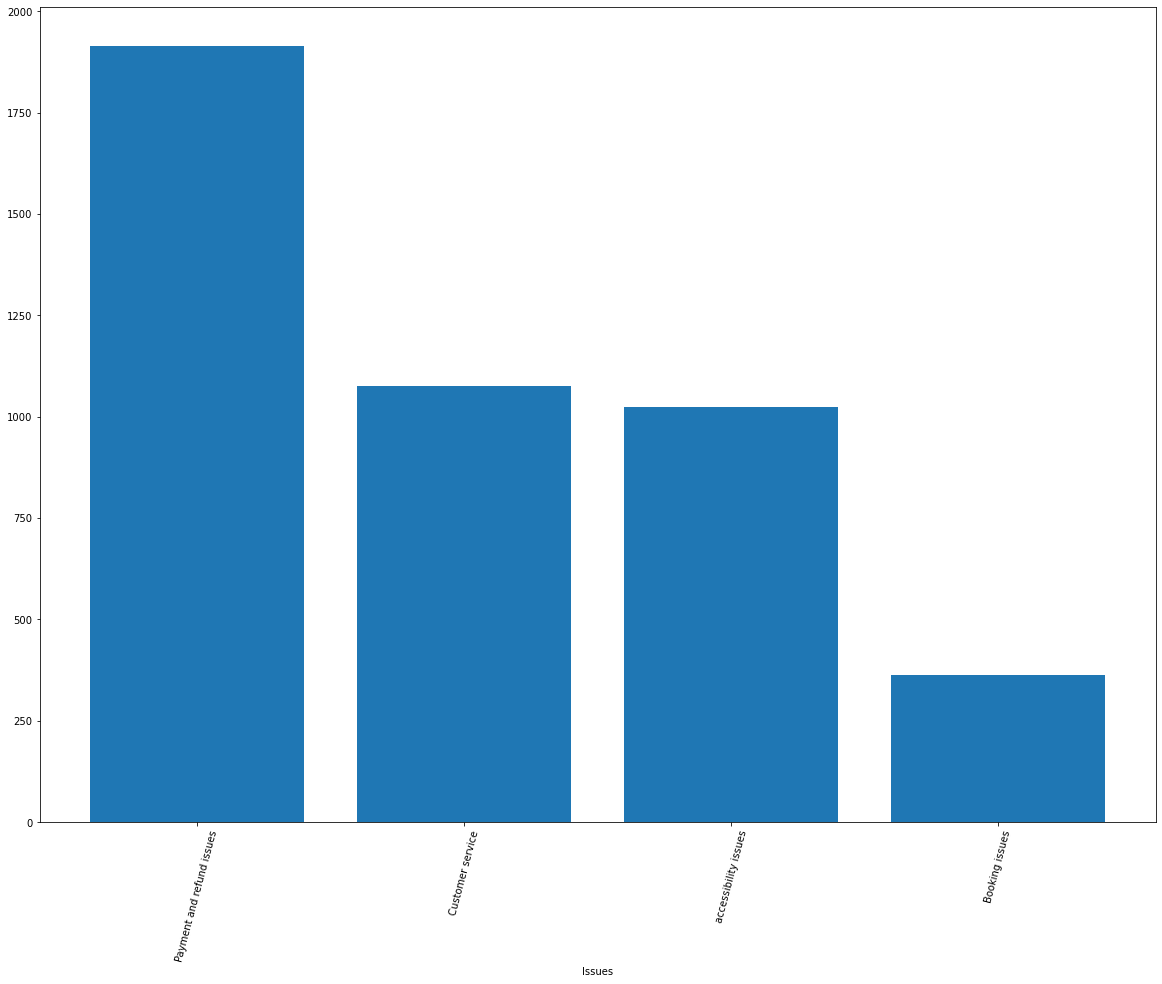

In [77]:
plt.figure(figsize=(20,15))
plt.bar([0,1,2,3], height=df_mmt['Issues'].value_counts())
plt.xlabel('Issues')
plt.xticks(ticks=[0,3,1,2], labels=issues, rotation=75)
plt.show()

C:\Users\kulsum kamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


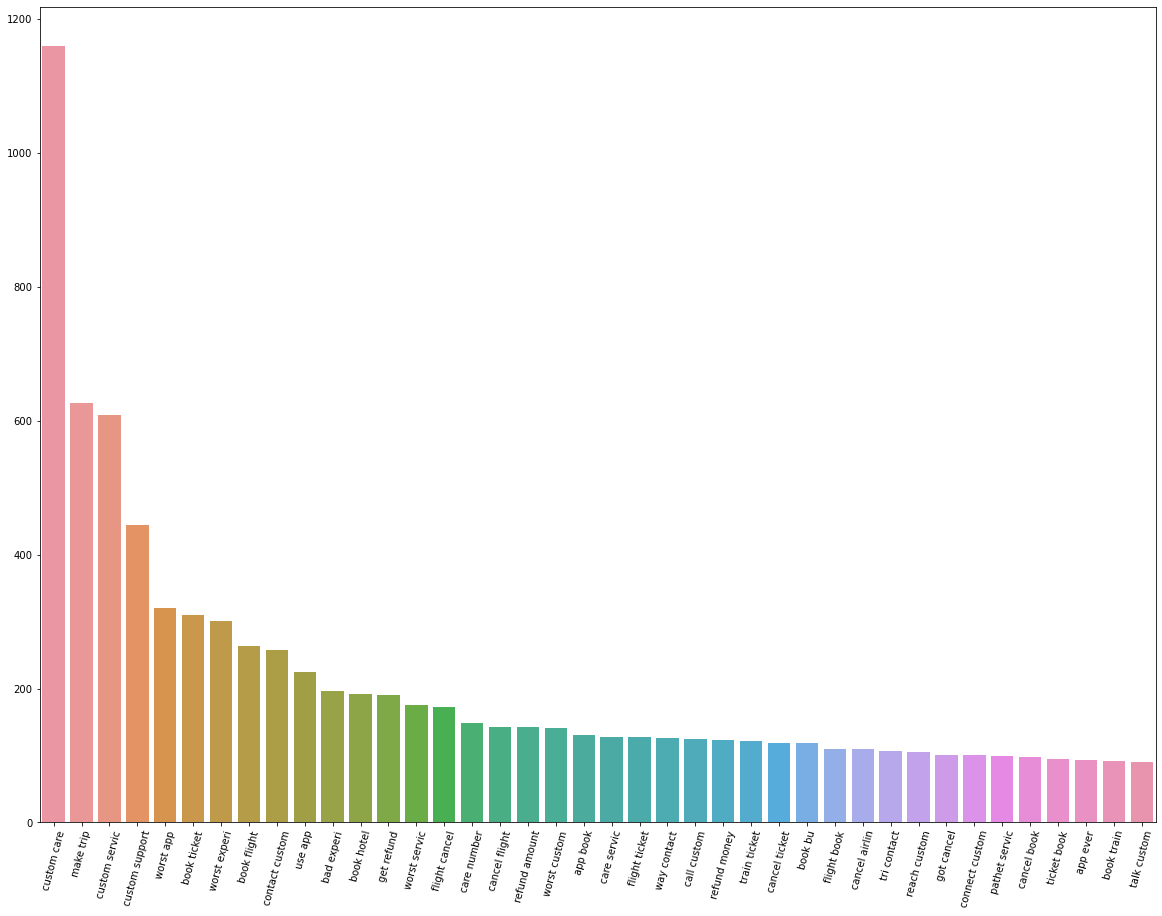

In [78]:
plt.figure(figsize=(20,15))
sns.barplot(list(vocabulary.keys())[:40],list(vocabulary.values())[:40])
plt.xticks(rotation=75)
plt.show()

C:\Users\kulsum kamal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


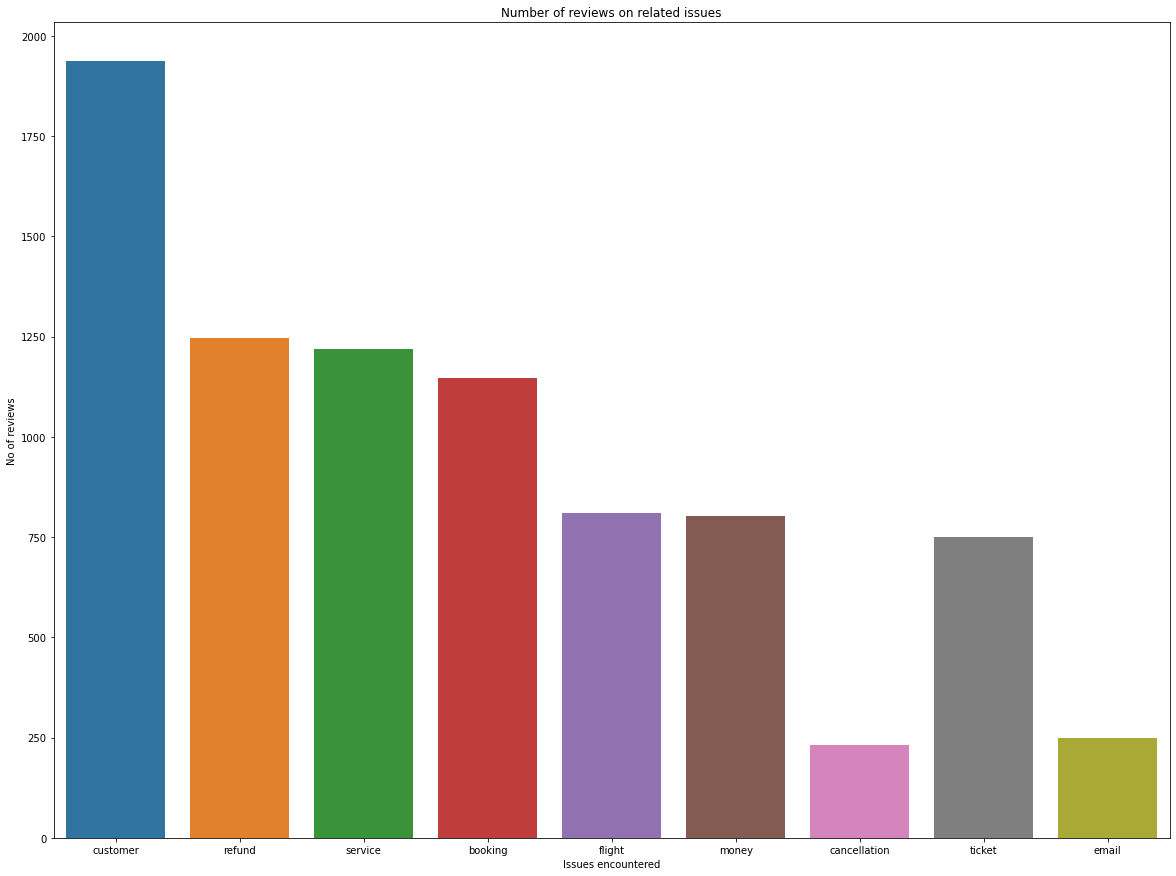

In [79]:
plt.figure(figsize=(20,15))
sns.barplot(list(issue_counts.keys()), list(issue_counts.values()))
plt.title("Number of reviews on related issues")
plt.xlabel("Issues encountered")
plt.ylabel("No of reviews")
plt.show()